# Playing around
Trying to intuitively understand Noise Interferometry in a free medium

In [129]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from NI_simulation.modules import ni_sim
from scipy import interpolate
import sys
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
# create sources
theta = 180
x = 10000*np.cos(np.deg2rad(theta))
y = 10000*np.sin(np.deg2rad(theta))

#sources = ni_sim.source_distribution2D().add_custom_sources(x,y,'gauss')
sources = ni_sim.source_distribution2D().endfire_circle(10, 10000, 100,label='gauss')

In [183]:
env = ni_sim.environment(sources, time_length=600, frequencies = np.linspace(1,20,20))

(-21000.0, 21000.0)

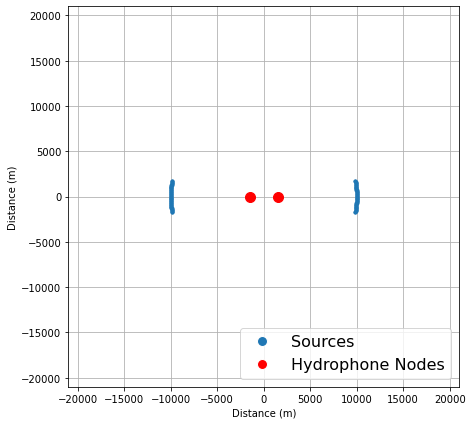

In [184]:
env.plot_env()
plt.xlim([-21000,21000])
plt.ylim([-21000,21000])

In [185]:
xA, xB = env.get_signals()

100%|██████████| 100/100 [00:00<00:00, 123.84it/s]


(-5.0, 5.0)

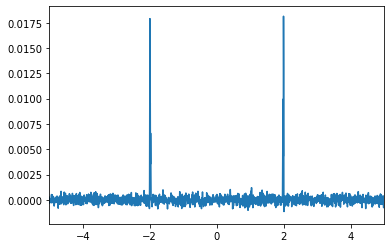

In [186]:
R = np.correlate(xA, xB, mode='full')
tx = np.linspace(-env.time_length, env.time_length, len(R))

plt.plot(tx,R)
plt.xlim(-5,5)